In [2]:
#STEP1: IMPORTING ALL REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,silhouette_score,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [2]:
#STEP-1:COLLECTING DATA
df=pd.read_csv("C:\\Users\\trigo\\Downloads\\city_day.csv\\city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
#STEP-2:DATA ANALYSIS
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df["PM2.5"].unique()

array([  nan, 73.24, 83.13, ..., 33.17, 25.4 , 24.38])

In [7]:
df["AQI_Bucket"].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [8]:
df["PM10"].unique()

array([   nan, 141.54, 122.41, ...,  58.54,  32.27,  66.  ])

In [9]:
PM2_MEAN=df["PM2.5"].mean()

In [10]:
df["PM2.5"]=df["PM2.5"].fillna(PM2_MEAN)


In [11]:
df["PM2.5"]

0        67.450578
1        67.450578
2        67.450578
3        67.450578
4        67.450578
           ...    
29526    15.020000
29527    24.380000
29528    22.910000
29529    16.640000
29530    15.000000
Name: PM2.5, Length: 29531, dtype: float64

In [12]:
#STEP-3:DATA PREPROCESSING:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [13]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [14]:
PM10_NEW=df["PM10"].mean()
df['PM10']=df['PM10'].fillna(PM10_NEW)

In [15]:
NO_NEW=df['NO'].mean()
df["NO"]=df["NO"].fillna(NO_NEW)

In [16]:
NH3_NEW=df['NH3'].mean()
df["NH3"]=df["NH3"].fillna(NH3_NEW)

In [17]:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2            3585
NOx            4185
NH3               0
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [18]:
#FILLING NULL VALUES WITH MEAN SINCE DROPPING NULL VALUES CAN LEAD US TO MISS IMPORTANT INFORMATION
NO2_NEW=df[ 'NO2'].mean()
df["NO2"]=df["NO2"].fillna(NO2_NEW)
       

In [19]:
NOx_NEW=df['NOx'].mean()
df["NOx"]=df["NOx"].fillna(NOx_NEW)

In [20]:
CO_NEW=df["CO"].mean()
df["CO"]=df["CO"].fillna(CO_NEW)

In [21]:
SO2_NEW=df["SO2"].mean()
df["SO2"]=df["SO2"].fillna(SO2_NEW)

In [22]:
O3_NEW=df["O3"].mean()
df["O3"]=df["O3"].fillna(O3_NEW)

In [23]:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [24]:
Benzene_NEW=df["Benzene"].mean()
df["Benzene"]=df["Benzene"].fillna(Benzene_NEW)

In [25]:
Toluene_NEW=df["Toluene"].mean()
df["Toluene"]=df["Toluene"].fillna(Toluene_NEW)


In [26]:
Xylene_NEW=df["Xylene"].mean()
df["Xylene"]=df["Xylene"].fillna(Xylene_NEW)

In [27]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [28]:
df["AQI_Bucket"].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [29]:
AQI_NEW=df["AQI"].mean()
df["AQI"]=df["AQI"].fillna(AQI_NEW)

In [30]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [31]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [32]:

AQI_Bucket_NEW=df["AQI_Bucket"].mode()[0]
df["AQI_Bucket"]=df["AQI_Bucket"].fillna(AQI_Bucket_NEW)

In [33]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [34]:
df.isnull().sum() #HENCE ALL NULL VALUES ARE DROPPED

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [35]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [36]:
#df1=df[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
 #      'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']]

In [37]:
#df1

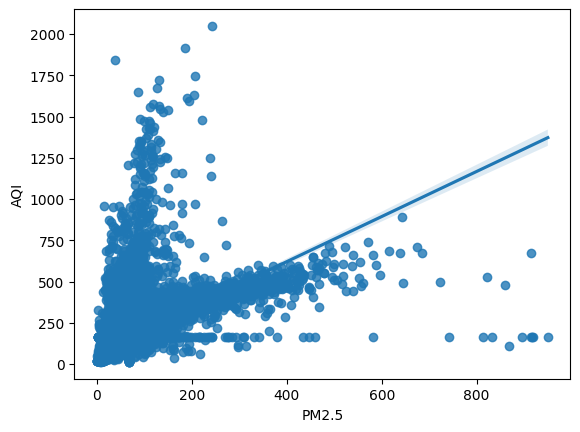

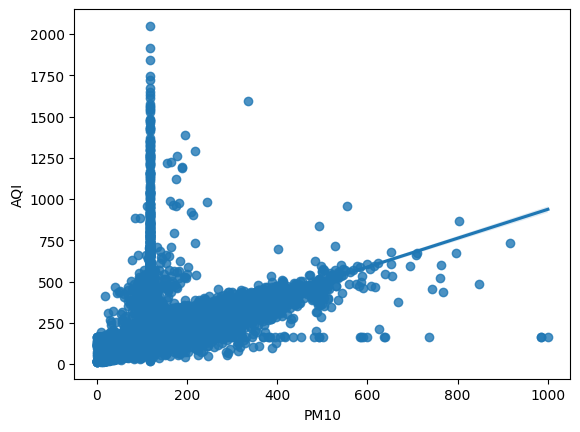

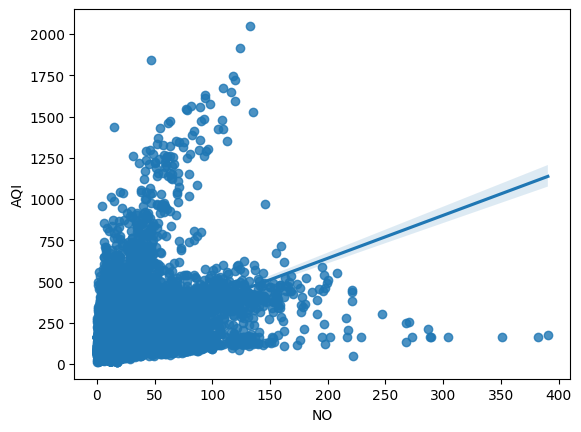

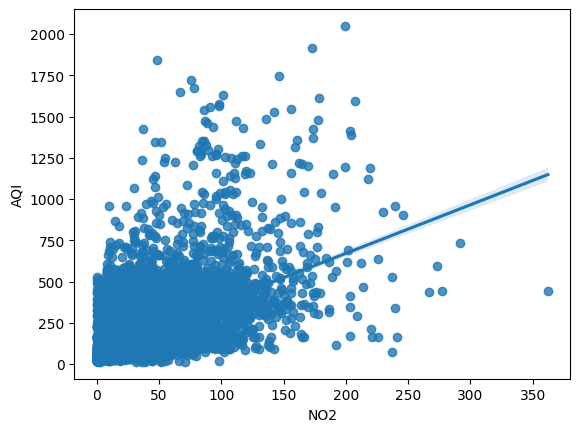

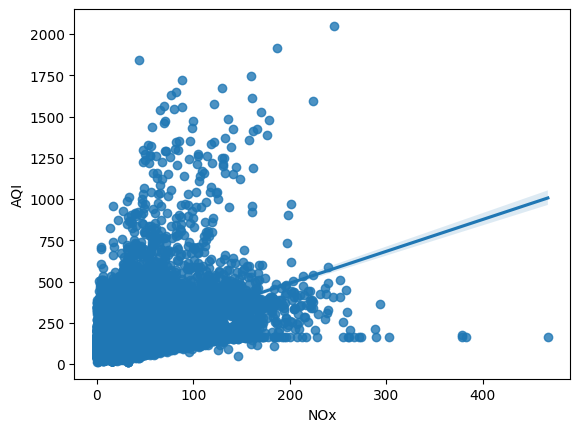

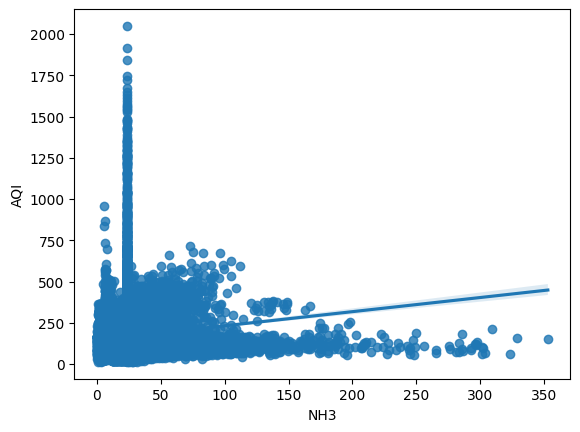

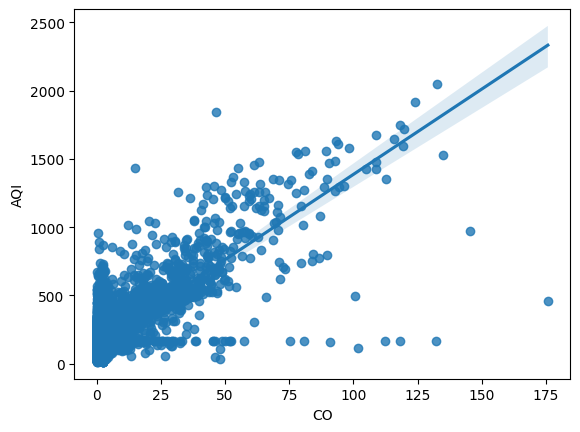

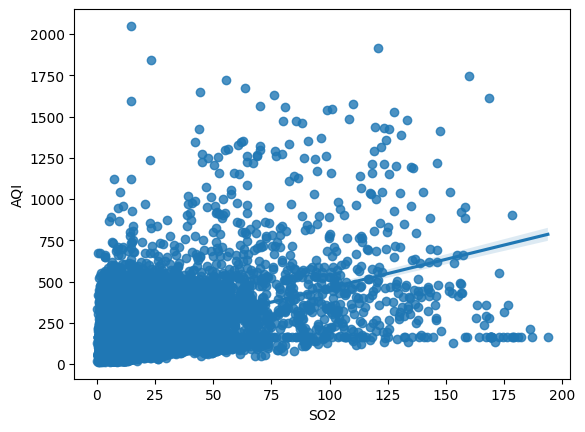

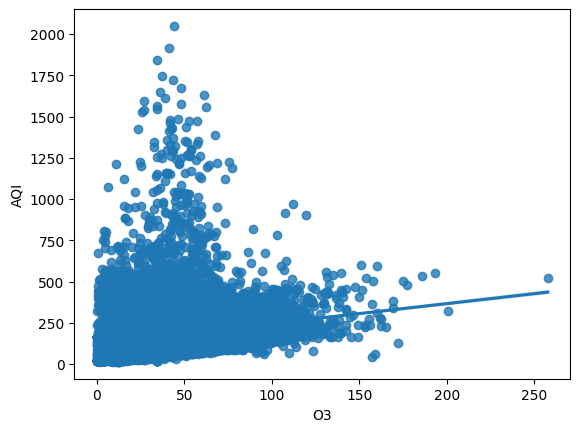

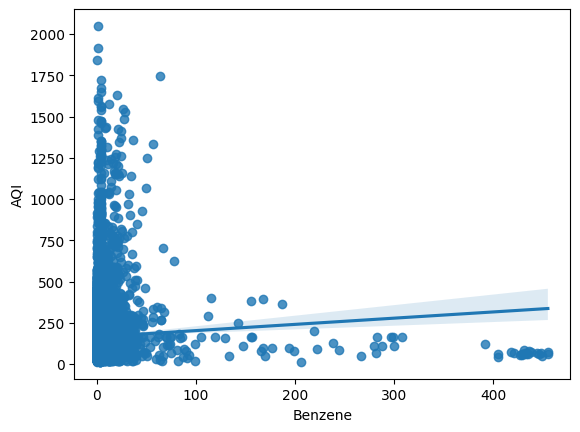

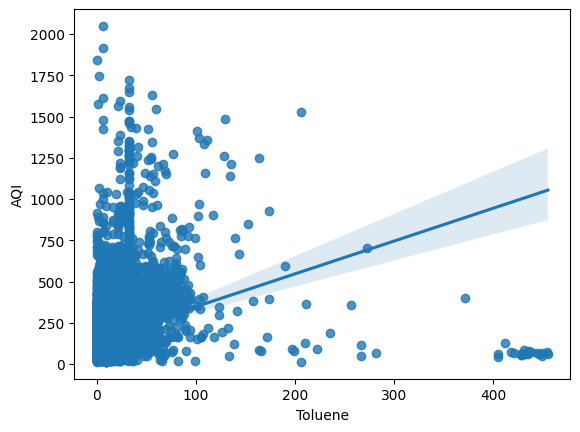

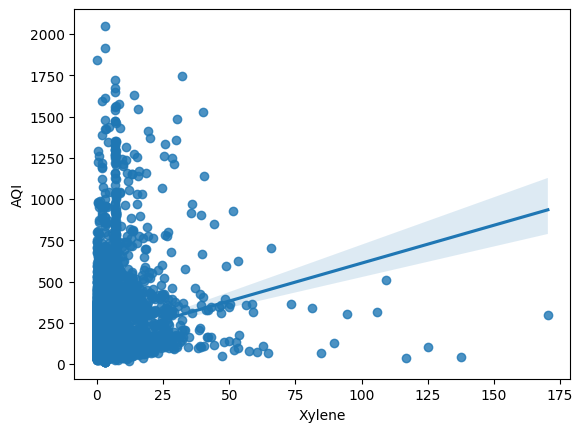

In [38]:
#STEP-4:DATA VISUALISATION
columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
#SCATTER PLOT TO CHECK HOW THE ATTRIBUTES AFFECTS MY TARGET COLUMN "AQI"
for col in columns:
    sns.regplot(x=df[col],y=df["AQI"]) 
    
    plt.show()

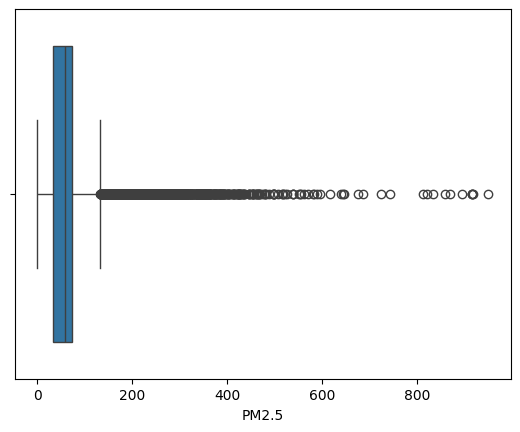

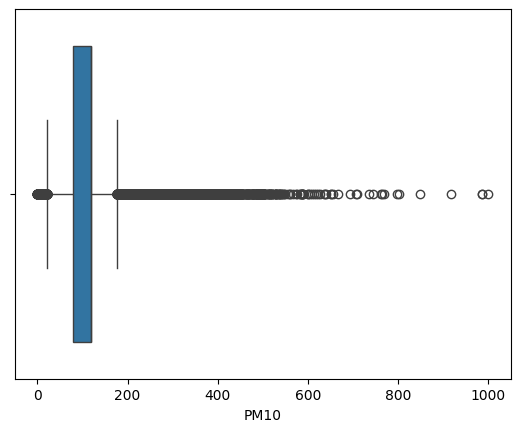

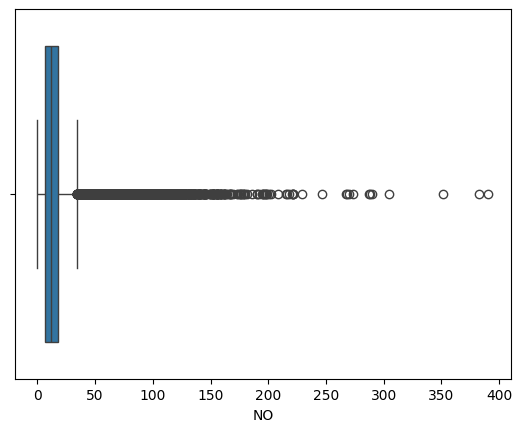

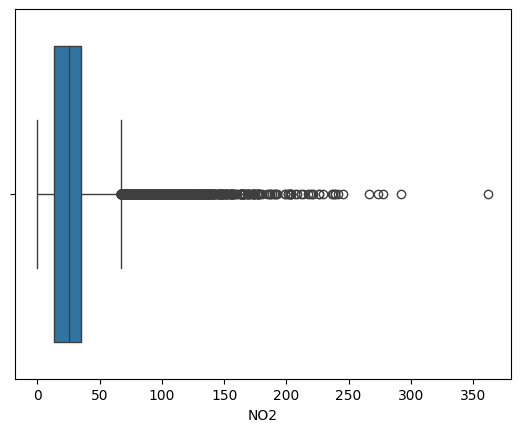

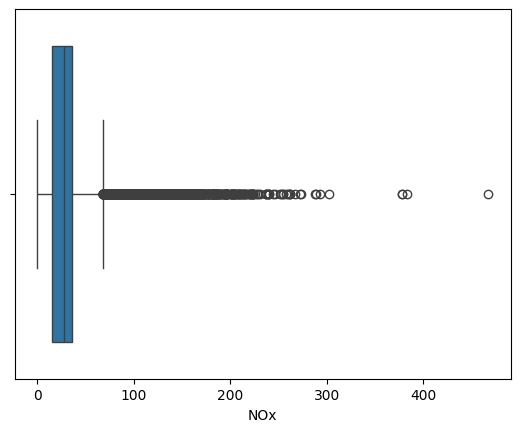

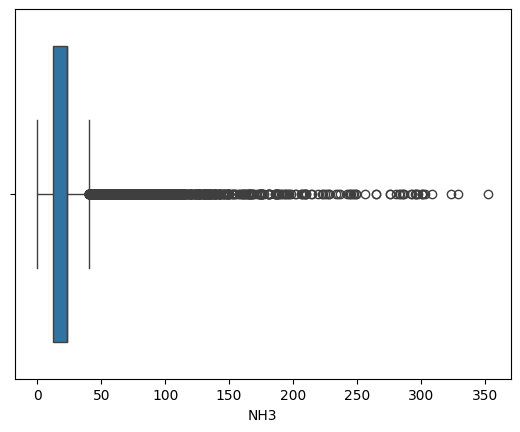

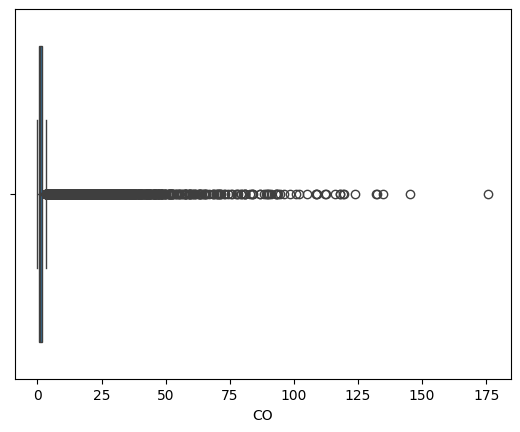

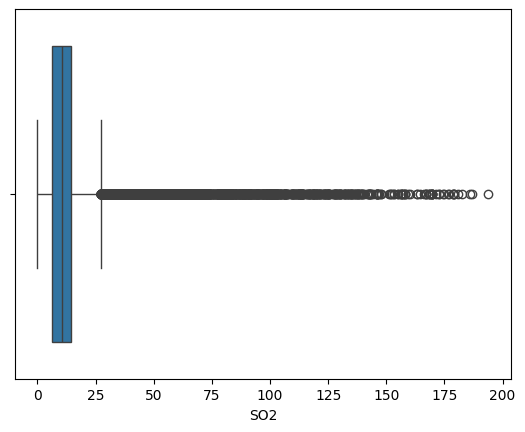

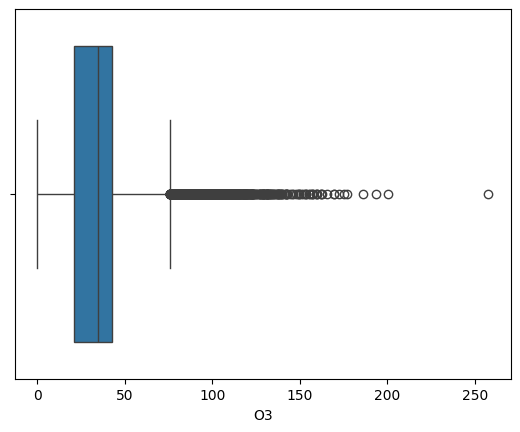

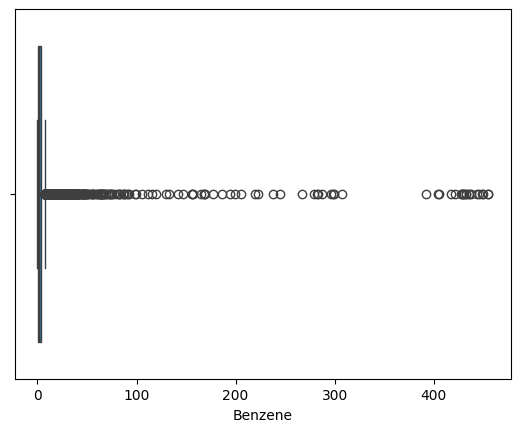

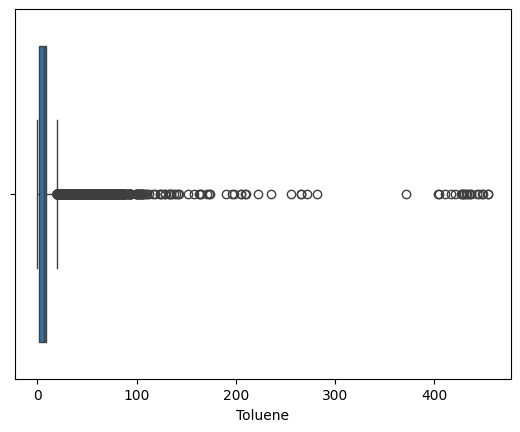

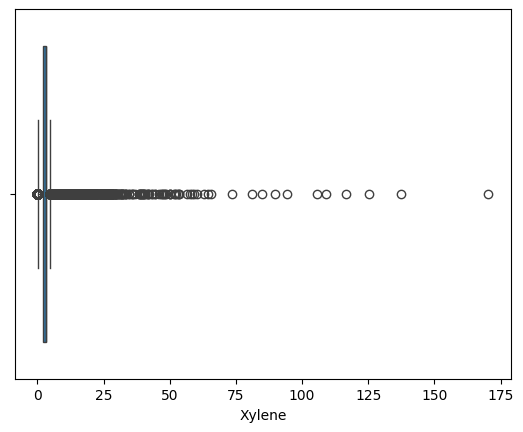

In [41]:
#PLOT-2:BOX PLOT: TO CHECK FOR ANY OUTLIERS ARE PRESENT OR NOT
columns1=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
for col in columns:
    sns.boxplot(x=df[col]) 
    
    plt.show()

In [48]:
#HENCE FROM THE ABOVE VISUALISATION WE SEE                               ARE HIGHLY AFFECTING "AQI"

In [49]:
df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [50]:
le=LabelEncoder()
df["AQI_Bucket"]=le.fit_transform(df["AQI_Bucket"])

In [51]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,1
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,1
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,1
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,1
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,0
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,3
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,3
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,3


In [52]:
df1=df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']]

In [53]:
#STEP-6:CHECKING COLLINEARITY
corre=df1.corr()
corre

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
PM2.5,1.000000,0.558079,0.426375,0.344341,0.380725,0.189227,0.086663,0.119512,0.155330,0.021934,0.107788,0.070459,0.628860,0.376320
PM10,0.558079,1.000000,0.431006,0.359165,0.415133,0.223025,0.047517,0.176188,0.203595,0.019215,0.121983,0.031256,0.484497,0.208993
NO,0.426375,0.431006,1.000000,0.462402,0.746223,0.156394,0.211639,0.166190,0.014218,0.033901,0.134201,0.059494,0.430600,0.229343
NO2,0.344341,0.359165,0.462402,1.000000,0.574190,0.165984,0.353237,0.382758,0.285448,0.025082,0.254074,0.133037,0.522994,0.234883
NOx,0.380725,0.415133,0.746223,0.574190,1.000000,0.128051,0.225097,0.208355,0.083063,0.037383,0.168780,0.056920,0.438363,0.198124
NH3,0.189227,0.223025,0.156394,0.165984,0.128051,1.000000,0.020029,-0.021005,0.078688,-0.011864,0.007442,-0.002215,0.137436,0.081171
CO,0.086663,0.047517,0.211639,0.353237,0.225097,0.020029,1.000000,0.472583,0.039787,0.061351,0.274882,0.145190,0.649679,0.207249
SO2,0.119512,0.176188,0.166190,0.382758,0.208355,-0.021005,0.472583,1.000000,0.156610,0.033059,0.265522,0.203766,0.452768,0.143474
O3,0.155330,0.203595,0.014218,0.285448,0.083063,0.078688,0.039787,0.156610,1.000000,0.018748,0.113683,0.068016,0.188590,0.015763
Benzene,0.021934,0.019215,0.033901,0.025082,0.037383,-0.011864,0.061351,0.033059,0.018748,1.000000,0.694691,0.092957,0.041518,0.028678


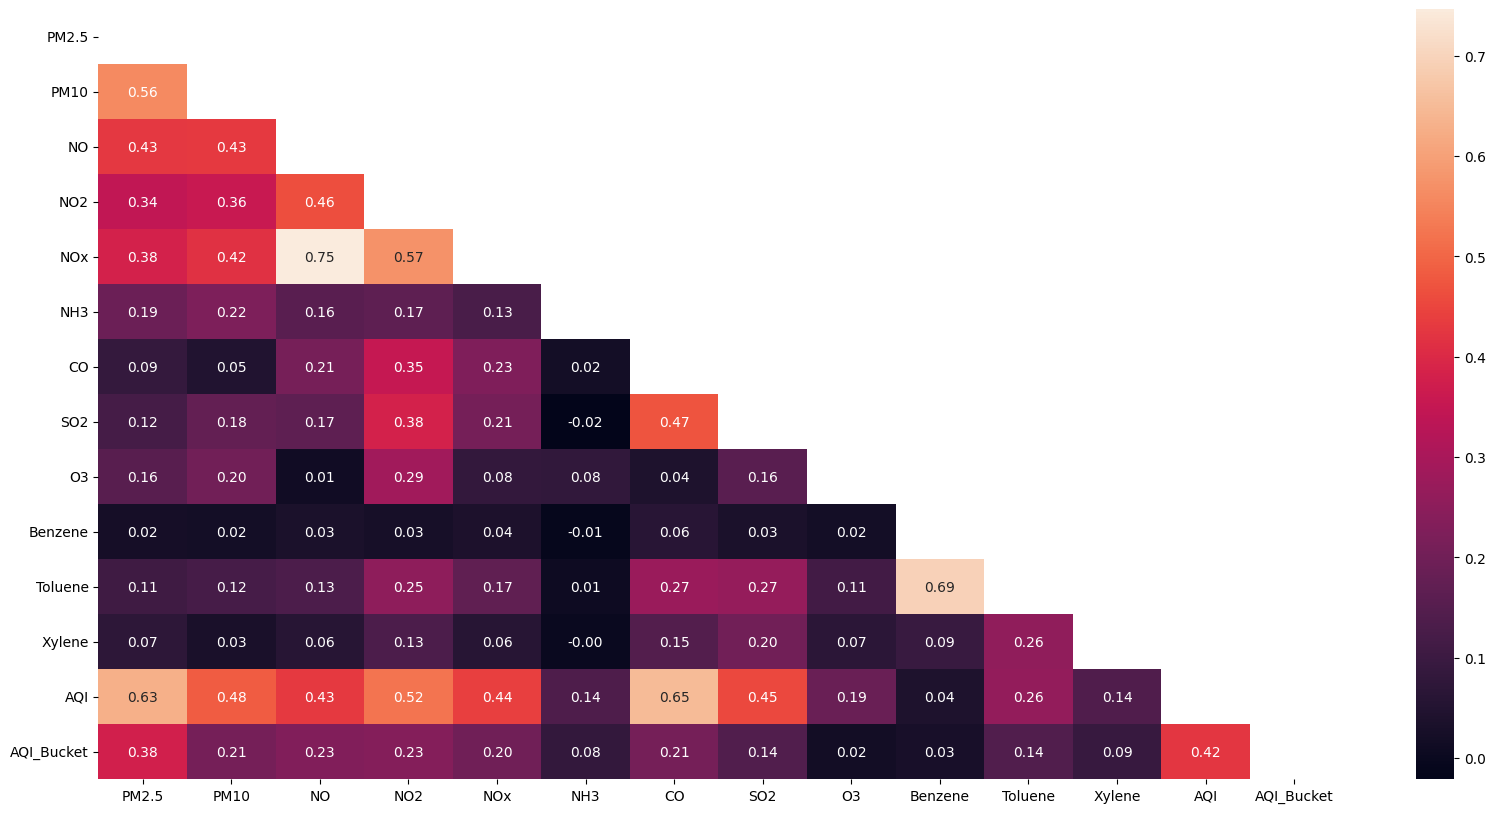

In [54]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [55]:
#HENCE FROM THE ABOVE CORRELATION VISUALISATION WE SEE THAT THE THE INPUT COLUMNS DOSENT HAVE CORRELATION MORE THAN 80% AND NEITHER
#THE INPUT COLUMNS ARE CORRELATED TO "AQI"

In [82]:
#STEP-7:IMPORTING THE MODEL LINEAR REGRESSION FROM SKLEARN PACKAGE
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [83]:
x=df1.drop(["AQI","AQI_Bucket"],axis=1)
y=df1["AQI"]

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)


In [85]:
#sc=StandardScaler()
#xtrain=sc.fit_transform(xtrain)

In [86]:
#xtest=sc.fit(xtest)

In [87]:
LR.fit(x,y)

LinearRegression()

In [88]:
LR.score(xtrain,ytrain)

0.7837820137686644

In [89]:
#PREDICTING "AQI" FOR TESTING DATA
ypred=LR.predict(xtest)
ypred

array([988.72547417, 109.08197966, 148.17914163, ..., 124.30697232,
        66.60181868, 167.03064424])

In [90]:
LR.score(xtest,ytest)

0.8145068529946728

mse=mean_squared_error(ytest,ypred)
mse

In [91]:
mse=mean_squared_error(ytest,ypred)
mse

3368.0203510834754

In [92]:
#FROM THE ABOVE SCORE WE SEE THAT MSE IS PRETTY MUCH LESS, WHICH SHOWS MY MODEL IS PRETTY GOOD.

In [93]:
r2score=r2_score(ytest,ypred)
r2score

0.8145068529946728

In [94]:
#R2_SCORE IS >80%, WHICH GIVES A GOOD ACCURACY

In [95]:
rmse=np.sqrt(mse)
rmse

58.03464785008586

In [96]:
#from sklearn.tree import DecisionTreeClassifier

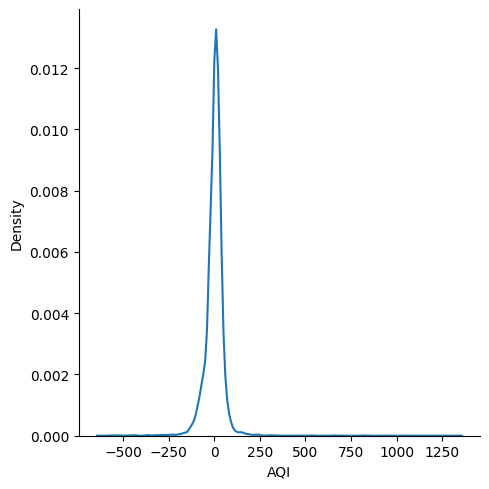

In [97]:
sns.displot(ypred-ytest,kind="kde")
plt.show()

In [ ]:
# This indicates that most of the predicted values (y_pred) are very close to the actual values (y_test), which suggests a high level 
#of accuracy for your model in predicting the Air Quality Index (AQI).

In [136]:
#PREDICTING "AQI" ON ANOTHER DATA :
df2=pd.read_csv("C:\\Users\\trigo\\Downloads\\CITYHOUR.csv")
df2

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015 01:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,01-01-2015 02:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,01-01-2015 03:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,01-01-2015 04:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,01-01-2015 05:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,30-06-2020 20:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,30-06-2020 21:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,30-06-2020 22:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,30-06-2020 23:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [137]:
#STEP-2:DATA ANALYSIS
df2.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [139]:
#df2["PM2.5"].unique()

In [140]:
#df2["AQI_Bucket"].unique()

In [141]:
#df2["PM10"].unique()

In [142]:
#PM2_MEAN=df2["PM2.5"].mean()
#df2["PM2.5"]=df2["PM2.5"].fillna(PM2_MEAN)

In [143]:
#STEP-3:DATA PREPROCESSING:
df2.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [144]:
df2.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [145]:
#PM10_NEW=df2["PM10"].mean()
#df2['PM10']=df2['PM10'].fillna(PM10_NEW)

In [146]:
#NO_NEW=df2['NO'].mean()
#df2["NO"]=df2["NO"].fillna(NO_NEW)

In [147]:
#NH3_NEW=df2['NH3'].mean()
#df2["NH3"]=df2["NH3"].fillna(NH3_NEW)

In [148]:
#NO2_NEW=df2[ 'NO2'].mean()
#df2["NO2"]=df2["NO2"].fillna(NO2_NEW)
       

In [149]:
#NOx_NEW=df2[ 'NOx'].mean()
#df2["NOx"]=df2["NOx"].fillna(NOx_NEW)
       

In [150]:
#CO_NEW=df2["CO"].mean()
#df2["CO"]=df2["CO"].fillna(CO_NEW)
       

In [152]:
#SO2_NEW=df2[ "SO2"].mean()
#df2["SO2"]=df2["SO2"].fillna(SO2_NEW)

In [153]:
#O3_NEW=df2["O3"].mean()
#df2["O3"]=df2["O3"].fillna(O3_NEW)

In [154]:
#Benzene_NEW=df2[ 'Benzene'].mean()
#df2["Benzene"]=df2["Benzene"].fillna(Benzene_NEW)

In [155]:
#Toluene_NEW=df2[ 'Toluene'].mean()
#df2["Toluene"]=df2["Toluene"].fillna(Toluene_NEW)

In [156]:
#Xylene_NEW=df2[ 'Xylene'].mean()
#df2["Xylene"]=df2["Xylene"].fillna(Xylene_NEW)

In [157]:
#AQI_NEW=df2["AQI"].mean()
#df2["AQI"]=df2["AQI"].fillna(AQI_NEW)

In [158]:
le=LabelEncoder()
df2["AQI_Bucket"]=le.fit_transform(df2["AQI_Bucket"])
#AQI_Bucket_NEW=df2[ 'AQI_Bucket'].mean()
#df2["AQI_Bucket"]=df2["AQI_Bucket"].fillna(AQI_Bucket_NEW)

In [170]:
df2.dropna(axis=0,inplace=True) #SINCE MOST OF THE VALUES ARE NULL, SO DROPPING THE ROWS WO=ITH NULL VALUES.

In [171]:
df2.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

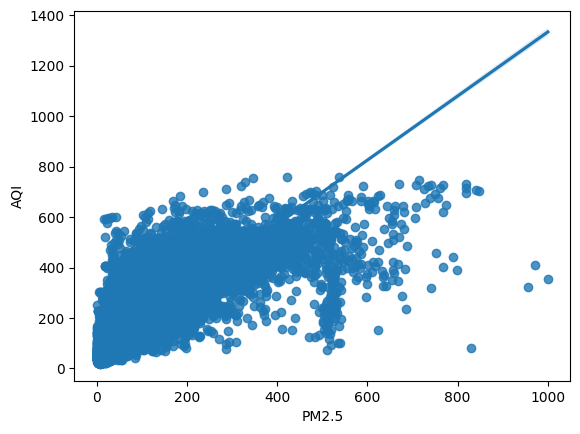

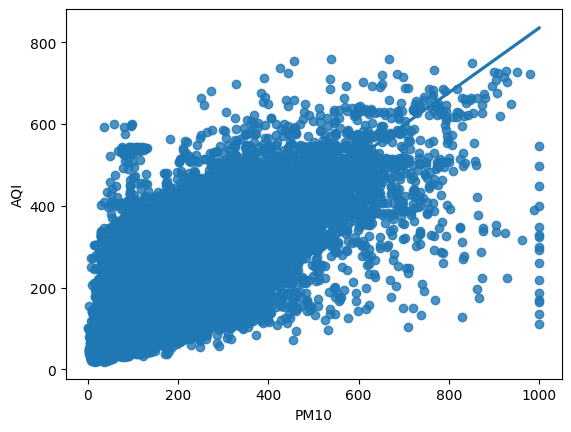

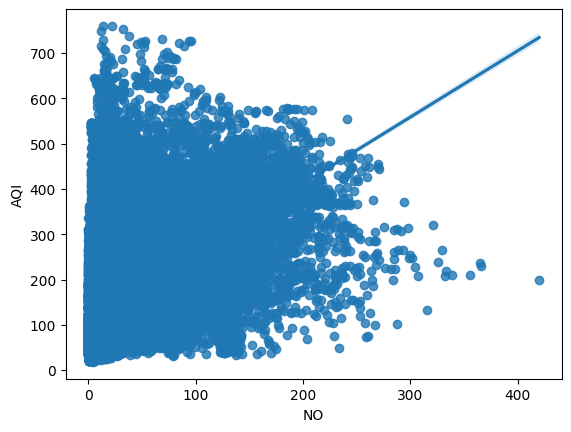

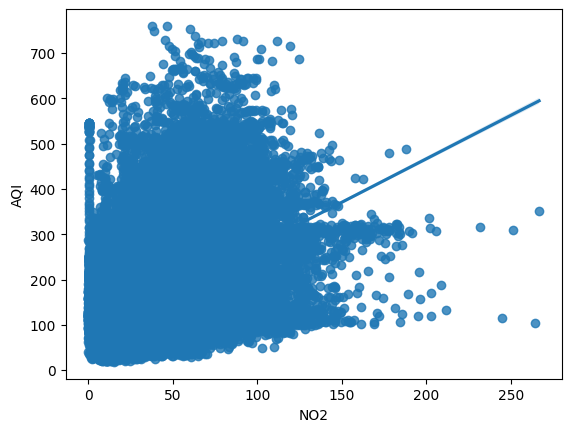

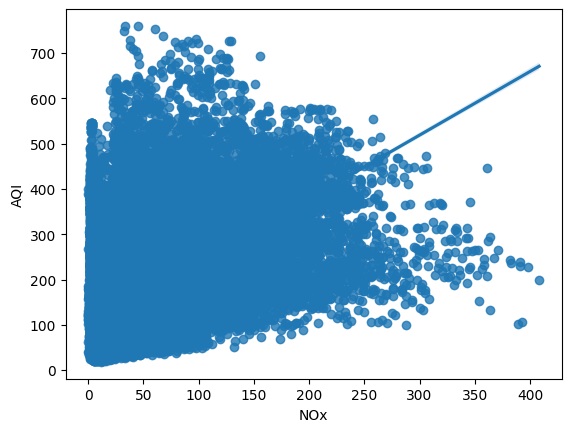

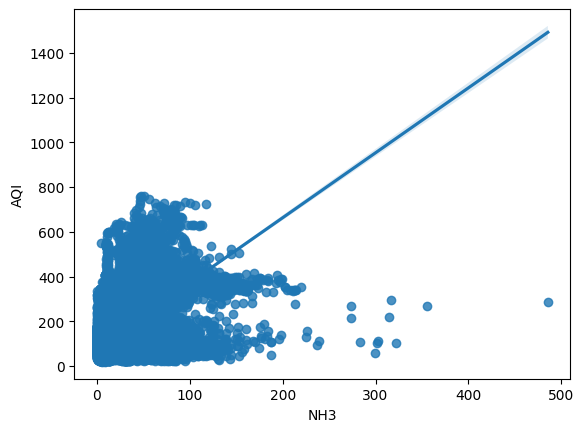

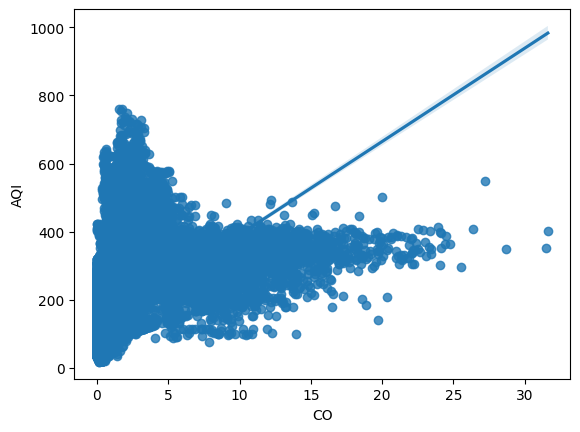

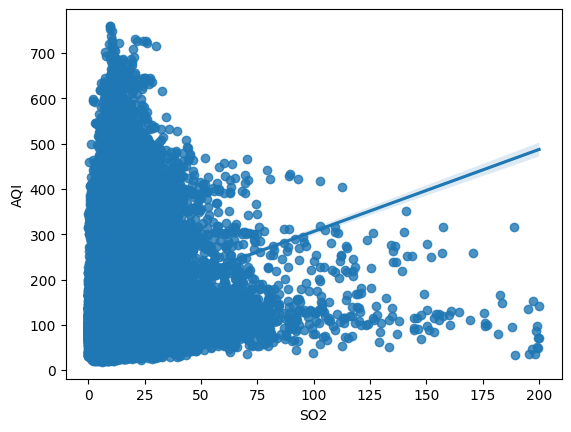

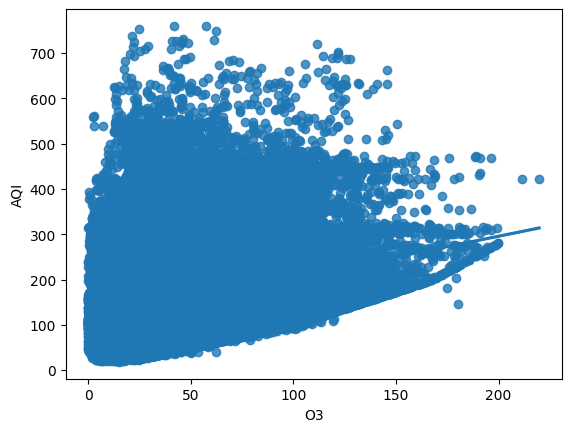

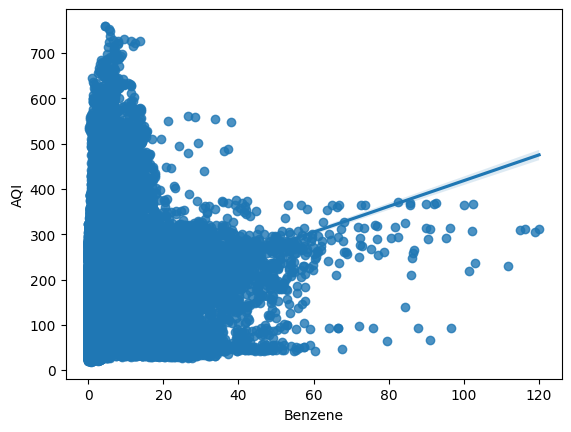

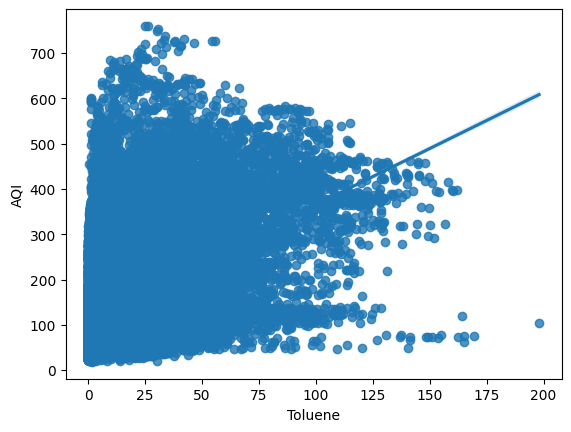

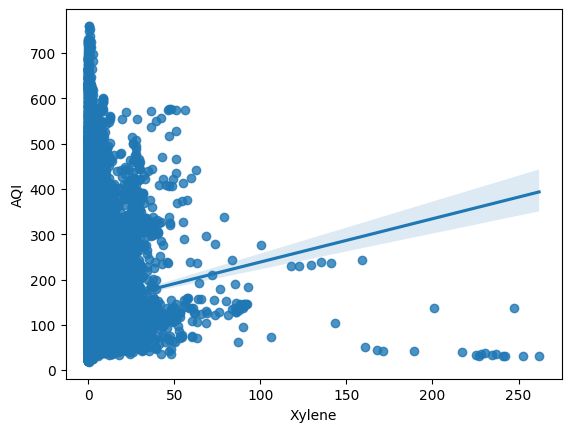

In [184]:
#STEP-4:DATA VISUALISATION
columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
#SCATTER PLOT TO CHECK HOW THE ATTRIBUTES AFFECTS MY TARGET COLUMN "AQI"
for col in columns:
    sns.regplot(x=df2[col],y=df2["AQI"]) 
    
    plt.show()

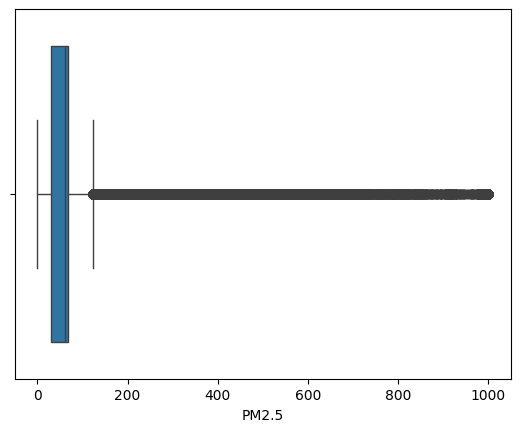

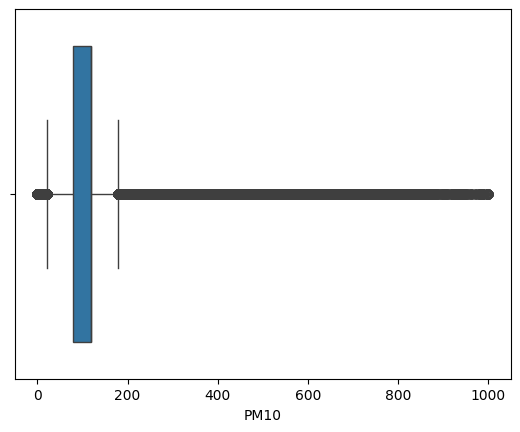

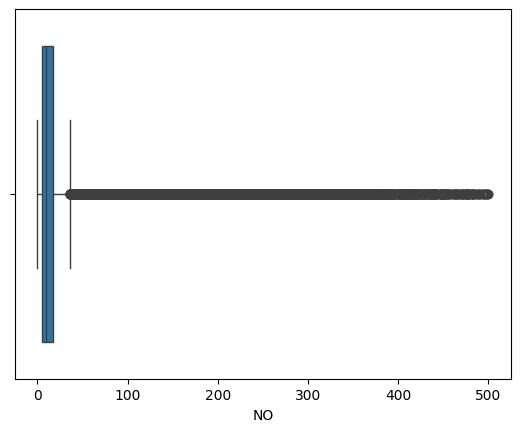

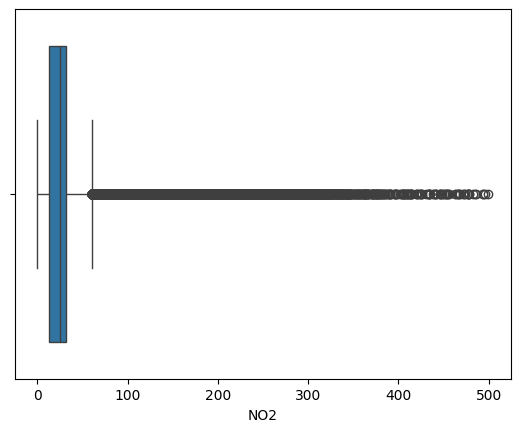

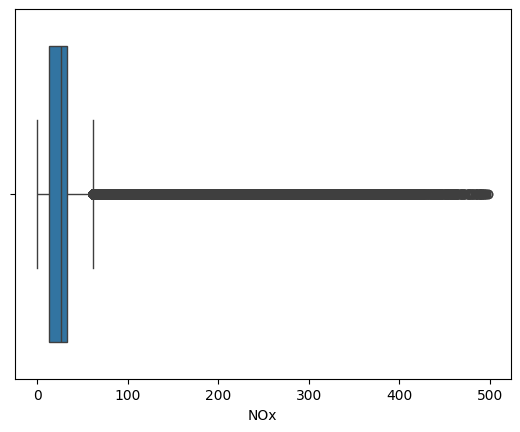

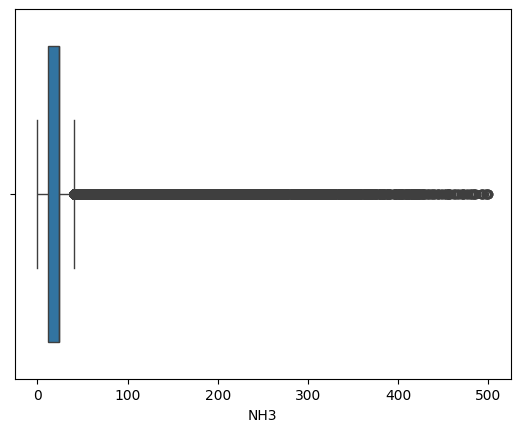

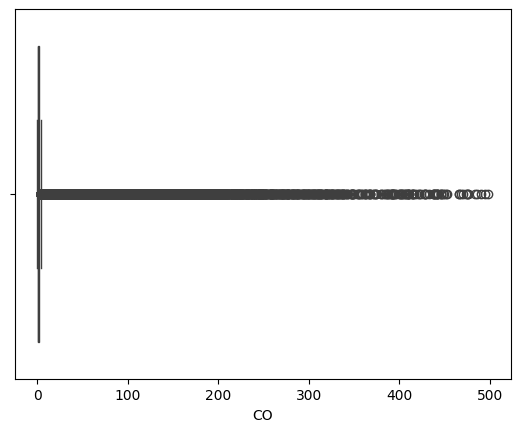

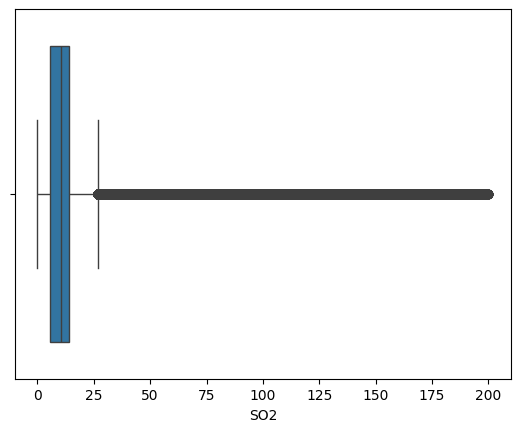

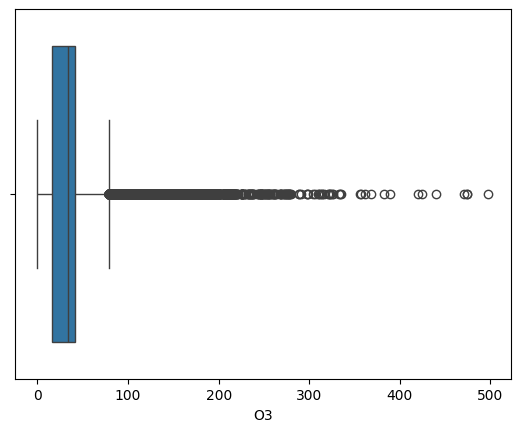

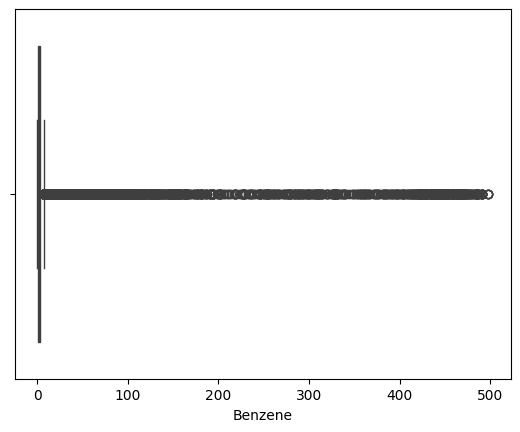

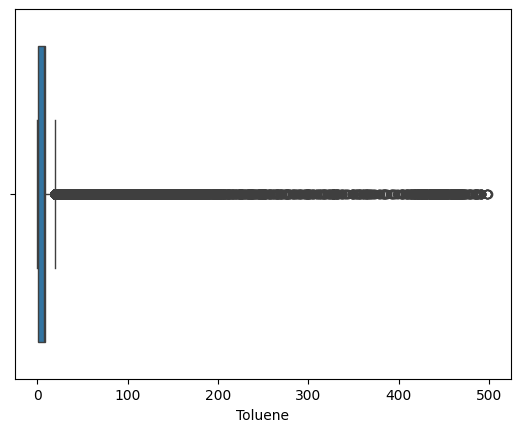

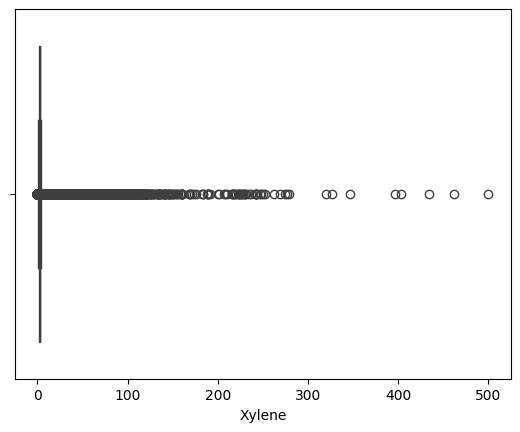

In [33]:
#PLOT-2:BOX PLOT: TO CHECK FOR ANY OUTLIERS ARE PRESENT OR NOT
columns1=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
for col in columns:
    sns.boxplot(x=df2[col]) 
    
    plt.show()

In [172]:
df3=df2[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']]

In [173]:
#STEP-4:CORRELATION 
corre=df3.corr()
corre

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
PM2.5,1.000000,0.862602,0.505044,0.483286,0.543674,0.527160,0.384705,0.219911,0.131282,0.216648,0.438300,0.080049,0.813621,0.386428
PM10,0.862602,1.000000,0.528090,0.559930,0.598298,0.523290,0.366000,0.247327,0.139196,0.240569,0.480360,0.108538,0.810531,0.347218
NO,0.505044,0.528090,1.000000,0.481771,0.876283,0.334831,0.290885,0.140461,-0.118202,0.393707,0.515071,0.146434,0.438119,0.217577
NO2,0.483286,0.559930,0.481771,1.000000,0.675837,0.333876,0.244073,0.309098,-0.059074,0.284522,0.478038,0.151932,0.455997,0.150202
NOx,0.543674,0.598298,0.876283,0.675837,1.000000,0.346283,0.334740,0.161820,-0.130556,0.506271,0.580266,0.203667,0.511375,0.217622
NH3,0.527160,0.523290,0.334831,0.333876,0.346283,1.000000,0.395964,0.182467,0.080119,0.095971,0.275266,0.021155,0.542146,0.296301
CO,0.384705,0.366000,0.290885,0.244073,0.334740,0.395964,1.000000,0.055381,-0.020623,0.134453,0.211221,0.127834,0.443803,0.275351
SO2,0.219911,0.247327,0.140461,0.309098,0.161820,0.182467,0.055381,1.000000,0.122902,0.040306,0.149748,0.050310,0.193404,0.050172
O3,0.131282,0.139196,-0.118202,-0.059074,-0.130556,0.080119,-0.020623,0.122902,1.000000,-0.124580,-0.070646,-0.127349,0.261900,0.017967
Benzene,0.216648,0.240569,0.393707,0.284522,0.506271,0.095971,0.134453,0.040306,-0.124580,1.000000,0.475094,0.250883,0.171475,0.035792


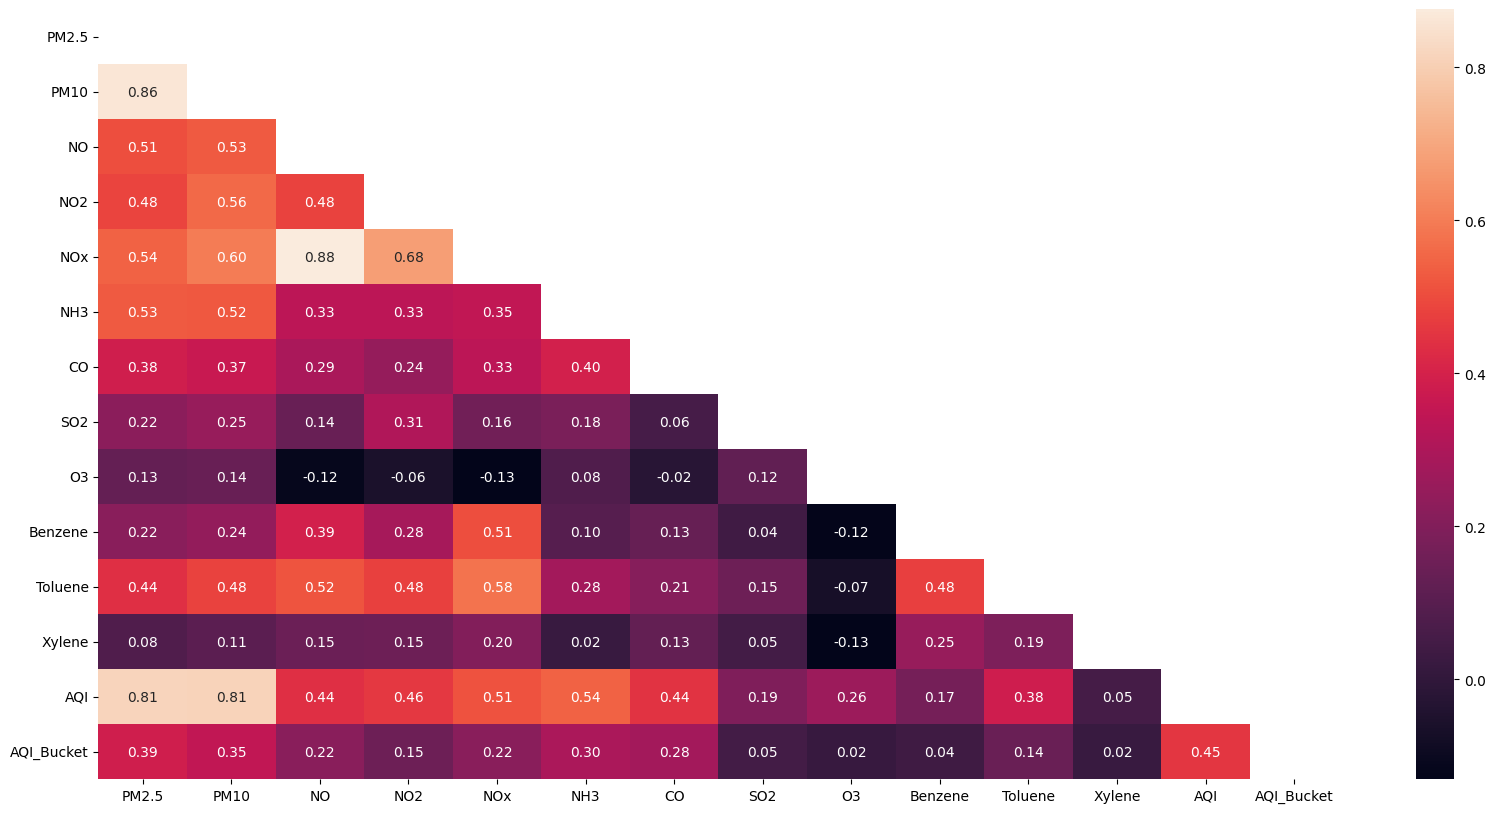

In [174]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
#SINCE THE COLUMNS "NOx" and "NO" are highly correlated to each other so dropping those columns for better accuracy.

In [175]:
#STEP-7:IMPORTING THE MODEL LINEAR REGRESSION FROM SKLEARN PACKAGE
from sklearn.linear_model import LinearRegression
LR1=LinearRegression()

In [185]:
x=df3.drop(["AQI","AQI_Bucket","NO","NOx"],axis=1)
y=df3["AQI"]

In [186]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [193]:
LR1.fit(xtrain,ytrain)

LinearRegression()

In [194]:
LR1.score(xtrain,ytrain)

0.7550683694565751

In [195]:
ypred2=LR1.predict(xtest)
ypred2

array([167.79478929, 102.67889295, 121.7186398 , ..., 220.19224432,
        89.0942332 , 260.39988675])

In [196]:
LR1.score(xtest,ytest)

0.7539916486524965

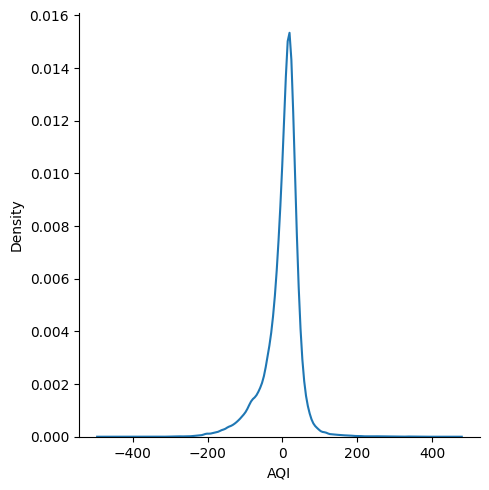

In [197]:
sns.displot(ypred2-ytest,kind="kde")
plt.show()

In [198]:
r2scores=r2_score(ypred2,ytest)
r2scores

0.6845707492497228

In [ ]:
#HENCE R2SCORES IS ABOVE 0.5 AND CLOSE TO 1 SO MY MODEL WORKS WELL.